In [10]:
%reload_ext autoreload
%autoreload 2

import pandas as pd
from pathlib import Path
import math
import numpy as np
import sys
import pickle
import matplotlib.pyplot as plt

sys.path.append(str(Path(os.getcwd()).parent))
from data_utilities import find_outliers, convert_age_from_days_to_years, extractqrcode, draw_age_distribution, calculate_code_age_distribution

### Total no. of artifacts in dataset

In [2]:
DATASET_PATH = Path('/mnt/datasets/anon-rgbd-5k')

In [3]:
scans = pd.read_csv(DATASET_PATH / 'labels/scans.csv')
print("Total no. of children:", len(scans['qrcode'].unique()))
scans.head()

FileNotFoundError: File b'/mnt/datasets/anon-rgbd-5k/labels/scans.csv' does not exist

In [14]:
#adding the Years column into dataframe
scans['Years'] = scans.apply(convert_age_from_days_to_years, axis=1)
scans.head()

,path,qrcode,height,weight,muac,age,sex,qrcode_scan,Years
0,/mnt/huawei_dataset/huawei_data/qrcode/1614660...,1614660905-zgy6r80k36,100.4,13.30,13.3,1640,male,1614660905-zgy6r80k36_1614800005738,4
1,/mnt/huawei_dataset/huawei_data/qrcode/1614660...,1614660906-80pjzgopjn,92.5,13.50,15.5,1233,male,1614660906-80pjzgopjn_1614776246296,3
2,/mnt/huawei_dataset/huawei_data/qrcode/1614660...,1614660905-w039gztofd,72.8,7.75,13.0,610,male,1614660905-w039gztofd_1614702389472,2
3,/mnt/huawei_dataset/huawei_data/qrcode/1614660...,1614660905-1bq9c2b1rk,86.7,10.50,13.8,1125,male,1614660905-1bq9c2b1rk_1614706563647,3
4,/mnt/huawei_dataset/huawei_data/qrcode/1614660...,1614660906-6qxgr8eefm,79.8,8.30,12.8,841,female,1614660906-6qxgr8eefm_1614805830126,2


### Total no. of children in the dataset

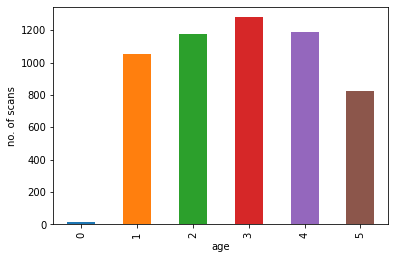

In [15]:
plt.figure()
draw_age_distribution(scans)
plt.show()

In [16]:
#Read the artifacts file
artifacts = pd.read_csv(DATASET_PATH / 'labels/artifacts.csv')
print("Total number of artifact in  dataset:", len(artifacts))
artifacts.head()

Total number of artifact in  dataset: 253325


,qrcode,path,qrcode_scan,key
0,1614660905-zgy6r80k36,/mnt/huawei_dataset/anon-rgbd-dataset/16146609...,1614660905-zgy6r80k36_1614800005738,101
1,1614660905-zgy6r80k36,/mnt/huawei_dataset/anon-rgbd-dataset/16146609...,1614660905-zgy6r80k36_1614800005738,101
2,1614660905-zgy6r80k36,/mnt/huawei_dataset/anon-rgbd-dataset/16146609...,1614660905-zgy6r80k36_1614800005738,101
3,1614660905-zgy6r80k36,/mnt/huawei_dataset/anon-rgbd-dataset/16146609...,1614660905-zgy6r80k36_1614800005738,101
4,1614660905-zgy6r80k36,/mnt/huawei_dataset/anon-rgbd-dataset/16146609...,1614660905-zgy6r80k36_1614800005738,101


101    112701
201     38000
102     37796
100     37684
200     13589
202     13555
Name: key, dtype: int64


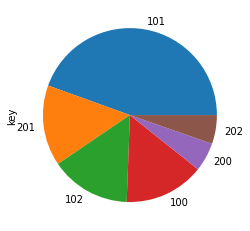

In [17]:
## keys for different scan type and their distribution in dataset
"- 100 - standing front scan",
"- 101 - standing 360 scan",
"- 102 - standing back scan",
"- 200 - lying front scan",
"- 201 - lying side scan",
"- 202 - lying back scan"
print(artifacts['key'].value_counts())
_ = artifacts['key'].value_counts().plot(kind='pie')

### Distribution of height, weight and age against each other

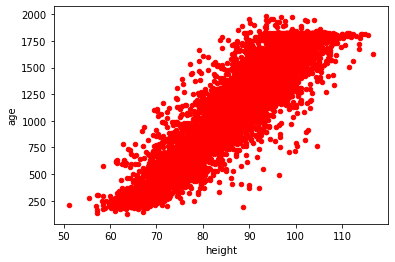

In [18]:
#distribution of height against age
height_vs_age = scans.plot.scatter(x='height', y='age', c='red')

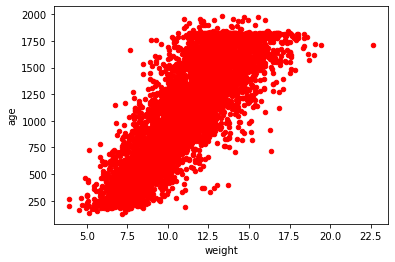

In [19]:
#distribution of weight against age
weight_vs_age =scans.plot.scatter(x='weight', y='age', c='red')

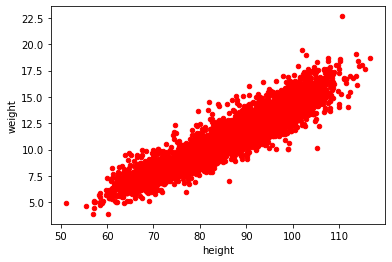

In [20]:
## distribution of height against weight
weight_vs_height = scans.plot.scatter(x='height', y='weight', c='red')

## Analyze outliers: 1) age, 2) weight, 3) height, 4) pixel values

In [22]:
scans.describe()

,height,weight,muac,age,Years
count,5534.000000,5534.000000,5534.000000,5534.000000,5534.000000
mean,85.554608,10.953534,13.926328,1062.575533,2.910734
std,11.461416,2.597178,1.023011,480.617091,1.340731
min,51.100000,3.900000,10.100000,126.000000,0.000000
25%,76.500000,8.900000,13.200000,654.000000,2.000000
50%,86.100000,10.950000,13.900000,1085.000000,3.000000
75%,94.700000,12.850000,14.600000,1489.000000,4.000000
max,116.700000,22.650000,18.500000,1983.000000,5.000000


### 1) Check age

##### Check age < 6 months or  > 6 years

In [24]:
find_outliers(scans, 'age', '<365/2', data_id_name='qr')

['1614660905-r8xzwi027g',
 '1614660905-brrkbp62fo',
 '1614660905-g5upgfvhif',
 '1614660905-kxid5v0gdd',
 '1614660906-q9dlwcwrh9',
 '1614660905-inbqztlzww',
 '1614660905-cn3gynmip2',
 '1614660905-ls20lo62z0',
 '1614660905-f0lqjc5k6u',
 '1614660906-l267d42tub',
 '1614660906-bxp43ivpyr',
 '1614660905-id18ocijuk',
 '1614660905-2wpl6cnna0']

In [25]:
find_outliers(scans, 'age', '>365*6', data_id_name='qr')

[]

### 2) Check weight

In [26]:
find_outliers(scans, 'weight', '<5.0', data_id_name='qr')

['1614660906-7cabcp9apk',
 '1614660905-iigtw7c7i1',
 '1614660905-cn3gynmip2',
 '1614660905-blg4n3bk97',
 '1614660906-l267d42tub',
 '1614660905-u3q2n0lo61',
 '1614660905-sti65q91be',
 '1614660905-i9b0ctif6s']

In [28]:
find_outliers(scans, 'weight', '>30.0', data_id_name='qr')

[]

### 3) Check height

In [30]:
find_outliers(scans, 'height', '<40.0', data_id_name='qr')

[]

In [31]:
find_outliers(scans, 'height', '>150.0', data_id_name='qr')

[]